In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/synthetic_placement_data.csv")

In [3]:
dataset.head(2)

,cgpa,score,placed
0,6.5,7.79,0
1,8.8,7.14,1


In [7]:
dataset["placed"].value_counts()

1    312
0    188
Name: placed, dtype: int64

In [9]:
x=dataset.iloc[:,:-1]
y=dataset["placed"]

# UNDER_SAMPLING

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [13]:
ru=RandomUnderSampler()
ru_x,ru_y=ru.fit_resample(x,y)

In [25]:
ru_y.value_counts()

0    188
1    188
Name: placed, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(ru_x,ru_y,test_size=0.2,random_state=42)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [118]:
lr.score(x_test,y_test)*100

46.05263157894737

In [119]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [120]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf

array([[13, 28],
       [13, 22]])

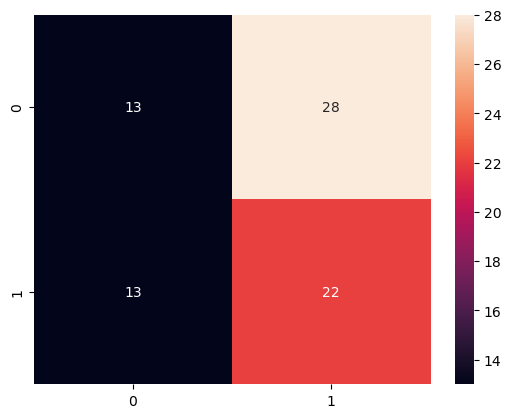

In [121]:
sns.heatmap(cf,annot=True)
plt.show()

In [123]:
precision_score(y_test,lr.predict(x_test))*100

44.0

In [124]:
recall_score(y_test,lr.predict(x_test))*100

62.857142857142854

In [125]:
f1_score(y_test,lr.predict(x_test))*100

51.76470588235295

# OVER_SAMPLING

In [69]:
from imblearn.over_sampling import RandomOverSampler

In [70]:
ro=RandomOverSampler()
ro_x,ro_y=ro.fit_resample(x,y)

In [71]:
ro_y.value_counts()

0    312
1    312
Name: placed, dtype: int64

In [103]:
x_train1,x_test1,y_train1,y_test1=train_test_split(ro_x,ro_y,test_size=0.2,random_state=30)

In [104]:
lr1=LogisticRegression()
lr1.fit(x_train1,y_train1)

LogisticRegression()

In [105]:
lr.score(x_test1,y_test1)*100

56.00000000000001

In [106]:
cf1=confusion_matrix(y_test1,lr.predict(x_test1))
cf

array([[23,  9],
       [29, 15]])

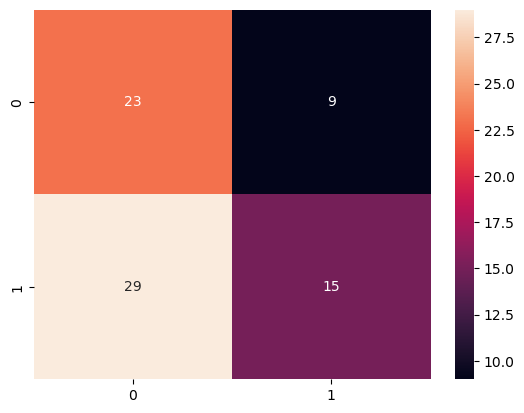

In [107]:
sns.heatmap(cf,annot=True)
plt.show()

In [126]:
precision_score(y_test1,lr.predict(x_test1))*100

47.94520547945205

In [127]:
recall_score(y_test1,lr.predict(x_test1))*100

58.333333333333336

In [128]:
f1_score(y_test1,lr.predict(x_test1))*100

52.63157894736842